<a href="https://colab.research.google.com/github/SahilPatki30082002/Youtube-Video-Analysis/blob/main/I036%2CI039%2CI040%2CI057_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [ ]:
!pip install opendatasets
!pip install textstat
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 15.9 MB/s 
     |████████████████████████████████| 2.0 MB 45.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from collections import Counter

import opendatasets as od

from textblob import TextBlob
from textblob import Word

import seaborn as sns
plt.style.use('seaborn-white')

from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

import scikitplot as skplt

from wordcloud import WordCloud
import wordcloud

from textwrap import wrap
import textstat

import tensorflow as tf
from keras import regularizers
from keras.utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing import text
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Embedding

import warnings
warnings.filterwarnings("ignore")

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-11-01 07:02:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-01 07:02:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-01 07:02:07--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

###Load Data

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset?select=IN_youtube_trending_data.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maitrishah01
Your Kaggle Key: ··········


100%|██████████| 1.02G/1.02G [00:19<00:00, 55.9MB/s]


In [ ]:
ogdata = pd.read_csv('/content/youtube-trending-video-dataset/US_youtube_trending_data.csv')
data1 = pd.read_csv('/content/youtube-trending-video-dataset/US_youtube_trending_data.csv')

In [ ]:
data1 = data1.drop(columns = ['channelId','channelTitle', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'])

In [ ]:
data2 = pd.read_csv('USvideos.csv')

data2 = data2.drop(columns = ['channel_title', 'thumbnail_link', 'comments_disabled', 'ratings_disabled','video_error_or_removed'])

data2.rename(columns = {'category_id':'categoryId', 'views':'view_count', 'publish_time': 'publishedAt'}, inplace = True)

In [ ]:
data = pd.concat([data1, data2],ignore_index=True)
data.tail()

,video_id,title,publishedAt,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description
203932,BZt0qjTWNhw,The Cat Who Caught the Laser,2018-05-18T13:00:04.000Z,15,18.14.06,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,The Cat Who Caught the Laser - Aaron's Animals
203933,1h7KV2sjUWY,True Facts : Ant Mutualism,2018-05-18T01:00:06.000Z,22,18.14.06,[none],1064798,60008,382,3936,NaN
203934,D6Oy4LfoqsU,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,2018-05-18T17:34:22.000Z,24,18.14.06,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,I had so much fun transforming Safiyas hair in...
203935,oV0zkMe1K8s,How Black Panther Should Have Ended,2018-05-17T17:00:04.000Z,1,18.14.06,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,How Black Panther Should Have EndedWatch More ...
203936,ooyjaVdt-jA,Official Call of Duty®: Black Ops 4 — Multipla...,2018-05-17T17:09:38.000Z,20,18.14.06,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,Call of Duty: Black Ops 4 Multiplayer raises t...


###Data Cleaning

In [ ]:
data.categoryId.unique()

array([22, 20, 24, 10, 26, 27, 23, 28,  1, 25, 17, 19, 15,  2, 29, 43])

In [ ]:
data = data.drop(columns = ['video_id'])
data

,title,publishedAt,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare..."
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...
203932,The Cat Who Caught the Laser,2018-05-18T13:00:04.000Z,15,18.14.06,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,The Cat Who Caught the Laser - Aaron's Animals
203933,True Facts : Ant Mutualism,2018-05-18T01:00:06.000Z,22,18.14.06,[none],1064798,60008,382,3936,NaN
203934,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,2018-05-18T17:34:22.000Z,24,18.14.06,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,I had so much fun transforming Safiyas hair in...
203935,How Black Panther Should Have Ended,2018-05-17T17:00:04.000Z,1,18.14.06,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,How Black Panther Should Have EndedWatch More ...


In [ ]:
# Missing Values

num_missing_desc = data.isnull().sum()[-1]    # No. of values with missing descriptions
print('Number of missing values: ' + str(num_missing_desc))
data = data.dropna()

Number of missing values: 4422


In [ ]:
data.isnull().sum()

title            0
publishedAt      0
categoryId       0
trending_date    0
tags             0
view_count       0
likes            0
dislikes         0
comment_count    0
description      0
dtype: int64

In [ ]:
ogdata['publishedAt.date']=pd.to_datetime(ogdata['publishedAt'])
ogdata['publishedAt.month']=ogdata['publishedAt.date'].dt.month
ogdata['publishedAt.day']=ogdata['publishedAt.date'].dt.day

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [ ]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

data['title']=data['title'].apply(lambda x:expand_contractions(x))
data['description']=data['description'].apply(lambda x:expand_contractions(x))

In [ ]:
data['title']=data['title'].apply(lambda x: x.lower())
data['description']=data['description'].apply(lambda x: x.lower())

In [ ]:
def preprocess(reviewtext):
    reviewtext = reviewtext.str.replace("(<br/>)","")
    reviewtext = reviewtext.str.replace("\w*\d\w*","") # Digits & Word Containing digits
    reviewtext = reviewtext.str.replace("[%s]"%re.escape(string.punctuation),"") #Punctuations
    #reviewtext = reviewtext.str.replace(" +","") #Extra Spaces
    return reviewtext

data['title'] = preprocess(data['title'])
data['description'] = preprocess(data['description'])
data['tags'] = preprocess(data['tags'])

In [ ]:
#Length
data['title_len'] = data['title'].astype(str).apply(len)
data['description_len'] = data['description'].astype(str).apply(len)

#Word Count
data['title_word_count'] = data['title'].apply(lambda x: len(str(x).split()))
data['description_word_count'] = data['description'].apply(lambda x: len(str(x).split()))
data['tag_word_count'] = data['tags'].apply(lambda x: len(str(x).split()))

In [ ]:
# Word Lemmatization - Title

lem = WordNetLemmatizer()
title_lem = []

for word in data['title']:
  list2 = nltk.word_tokenize(word)
  lemmatized_string = ' '.join([lem.lemmatize(words) for words in list2])
  title_lem.append(lemmatized_string)

data['title_lem'] = title_lem

In [ ]:
# Word Lemmatization - Description

lem = WordNetLemmatizer()
desc_lem = []

for word in data['description']:
  list2 = nltk.word_tokenize(word)
  lemmatized_string = ' '.join([lem.lemmatize(words) for words in list2])
  desc_lem.append(lemmatized_string)

data['description_lem'] = desc_lem

In [ ]:
import json #import data using python json module
with open('/content/youtube-trending-video-dataset/US_category_id.json','r') as f:
    category_data_us= json.loads(f.read())
US_cat = pd.json_normalize(category_data_us,record_path='items')
US_cat['id']= US_cat['id'].astype(int)
data= data.merge(US_cat,how ='left',left_on= 'categoryId',\
                                 right_on='id').rename(columns= {'snippet.title':'category_name'})

In [ ]:
data

,title,publishedAt,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,...,description_word_count,tag_word_count,title_lem,description_lem,kind,etag,id,category_name,snippet.assignable,snippet.channelId
0,i asked her to be my girlfriend,2020-08-11T19:20:14Z,22,2020-08-12T00:00:00Z,brawadisprankbasketballskitsghostfunny videosv...,1514614,156908,5855,35313,subscribe to brawadis ▶ httpbitlysubscribetobr...,...,47,10,i asked her to be my girlfriend,subscribe to brawadis ▶ httpbitlysubscribetobr...,youtube#videoCategory,QMEBz6mxVdklVaq8JwesPEw_4nI,22,People & Blogs,True,UCBR8-60-B28hp2BmDPdntcQ
1,apex legends stories from the outlands – “the...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,Apex LegendsApex Legends charactersnew Apex Le...,2381688,146739,2794,16549,while running her own modding shop ramya parek...,...,97,44,apex legend story from the outlands – “ the en...,while running her own modding shop ramya parek...,youtube#videoCategory,I3IL9xGIM3MsULlqR4tvCsEKv98,20,Gaming,True,UCBR8-60-B28hp2BmDPdntcQ
2,i left youtube for a month and this is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,jacksepticeyefunnyfunny memememesjacksepticeye...,2038853,353787,2628,40221,i left youtube for a month and this is what ha...,...,29,26,i left youtube for a month and this is what ha...,i left youtube for a month and this is what ha...,youtube#videoCategory,Qi1csjh-POReitZEbR7CUw7dmao,24,Entertainment,True,UCBR8-60-B28hp2BmDPdntcQ
3,xxl freshman class revealed official announc...,2020-08-11T16:38:55Z,10,2020-08-12T00:00:00Z,xxl freshmanxxl freshmen xxl freshman freshman...,496771,23251,1856,7647,subscribe to xxl → httpbitlysubscribexxl \rxxl...,...,89,20,xxl freshman class revealed official announcement,subscribe to xxl → httpbitlysubscribexxl xxl p...,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
4,ultimate diy home movie theater for the labran...,2020-08-11T15:10:05Z,26,2020-08-12T00:00:00Z,The LaBrant FamilyDIYInterior DesignMakeoverDe...,1123889,45802,964,2196,transforming the labrant family is empty white...,...,208,31,ultimate diy home movie theater for the labran...,transforming the labrant family is empty white...,youtube#videoCategory,gYzt8dB8mlod-84ipMtjynYe9xU,26,Howto & Style,True,UCBR8-60-B28hp2BmDPdntcQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199510,bts plays with puppies while answering fan que...,2018-05-18T16:39:29.000Z,22,18.14.06,BuzzFeedBuzzFeedVideoPuppy Interviewpuppyjohn ...,8259128,645888,4052,62610,bts with the pps the puppies these adorable pu...,...,61,11,bts play with puppy while answering fan question,bts with the pps the puppy these adorable pupp...,youtube#videoCategory,QMEBz6mxVdklVaq8JwesPEw_4nI,22,People & Blogs,True,UCBR8-60-B28hp2BmDPdntcQ
199511,the cat who caught the laser,2018-05-18T13:00:04.000Z,15,18.14.06,aarons animalsaaronsanimalscatcatskittenkitten...,1685609,38160,1385,2657,the cat who caught the laser aaron is animals,...,9,3,the cat who caught the laser,the cat who caught the laser aaron is animal,youtube#videoCategory,ra8H7xyAfmE2FewsDabE3TUSq10,15,Pets & Animals,True,UCBR8-60-B28hp2BmDPdntcQ
199512,i gave safiya nygaard a perfect hair makeover ...,2018-05-18T17:34:22.000Z,24,18.14.06,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,i had so much fun transforming safiyas hair in...,...,67,51,i gave safiya nygaard a perfect hair makeover ...,i had so much fun transforming safiyas hair in...,youtube#videoCategory,Qi1csjh-POReitZEbR7CUw7dmao,24,Entertainment,True,UCBR8-60-B28hp2BmDPdntcQ
199513,how black panther should have ended,2018-05-17T17:00:04.000Z,1,18.14.06,Black PantherHISHEMarvelInfinity WarHow It Sho...,5660813,192957,2846,13088,how black panther should have endedwatch more ...,...,230,15,how black panther should have ended,how black panther should have endedwatch more ...,youtube#videoCategory,IfWa37JGcqZs-jZeAyFGkbeh6bc,1,Film & A

###Exploratory Data Analysis

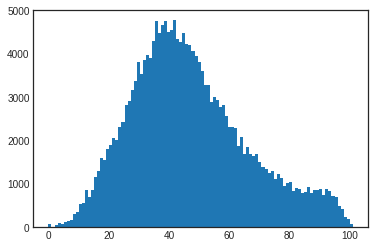

In [ ]:
#Title Length Histogram

plt.hist(data['title_len'],bins=100)
plt.show()

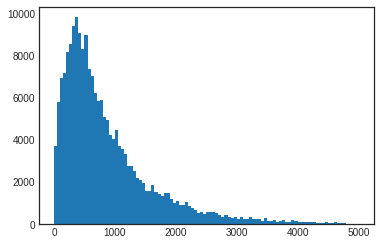

In [ ]:
#Description Length Histogram

plt.hist(data['description_len'],bins=100)
plt.show()

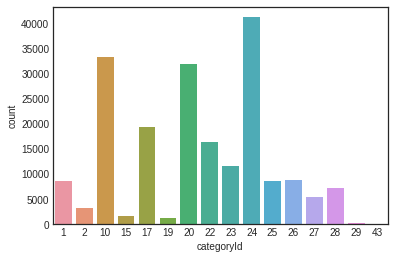

In [ ]:
#Frequency of Category

sns.countplot(data['categoryId'])
plt.show()

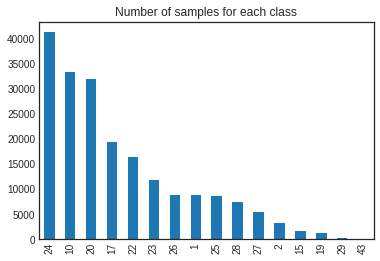

In [ ]:
data['categoryId'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples', 
                                                                title='Number of samples for each class')

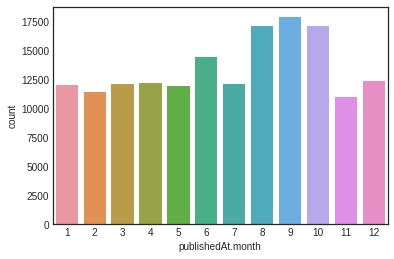

In [ ]:
#Monthwise Published videos

sns.countplot(ogdata['publishedAt.month'])
plt.show()

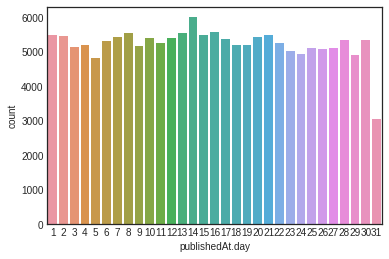

In [ ]:
#Daywise Published Videos

sns.countplot(ogdata['publishedAt.day'])
plt.show()

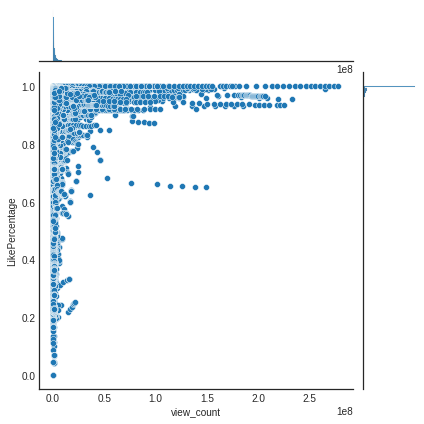

In [ ]:
data['LikePercentage'] = data['likes'] / (data['dislikes'] + data['likes'])
sns.jointplot(data['view_count'], data['LikePercentage'])

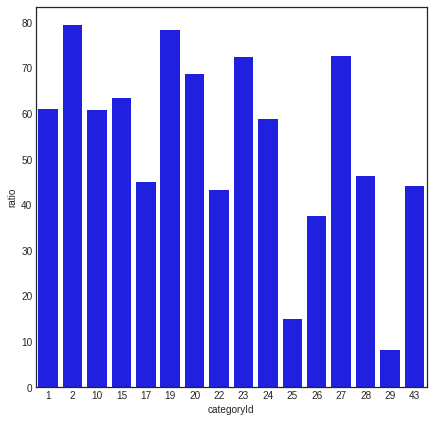

In [ ]:
like_dislike_ratio = data.groupby('categoryId')['likes'].agg('sum') / data.groupby('categoryId')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['categoryId','ratio']
plt.subplots(figsize=(7,7))
sns.barplot(y="ratio", x="categoryId", data=like_dislike_ratio,
            label="Likes-Dislikes Ratio", color="b")

In [ ]:
def visualize_most(my_df, column, num=10): # getting the top 7 videos by default
    sorted_df = my_df.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

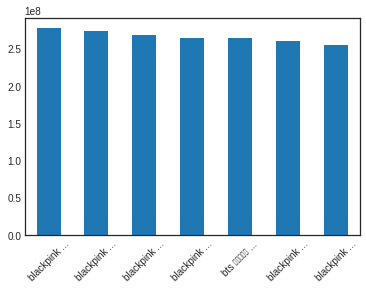

In [ ]:
visualize_most(data, 'view_count', num=7)

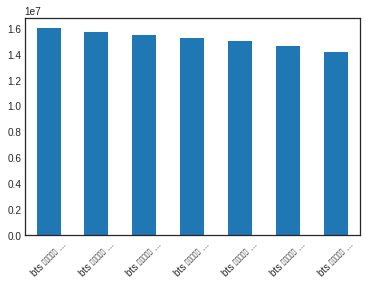

In [ ]:
visualize_most(data, 'likes', num=7)

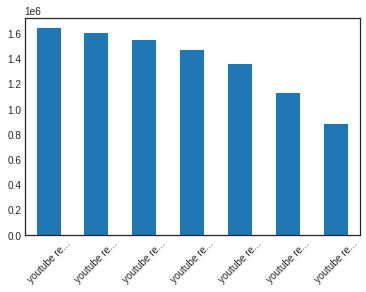

In [ ]:
visualize_most(data, 'dislikes', num=7)

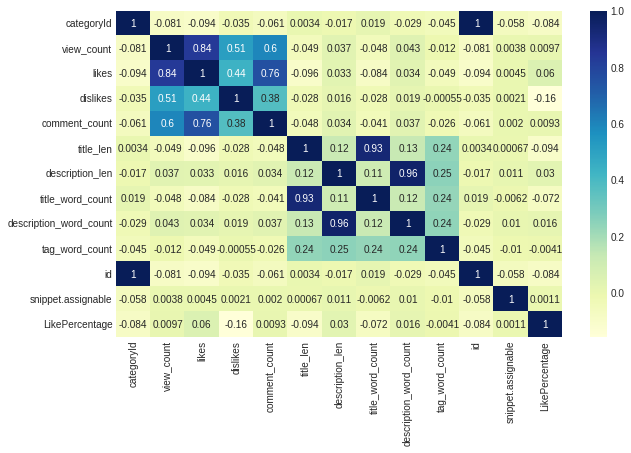

In [ ]:
figure = plt.subplots(figsize=(10,6))
corr_map = sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

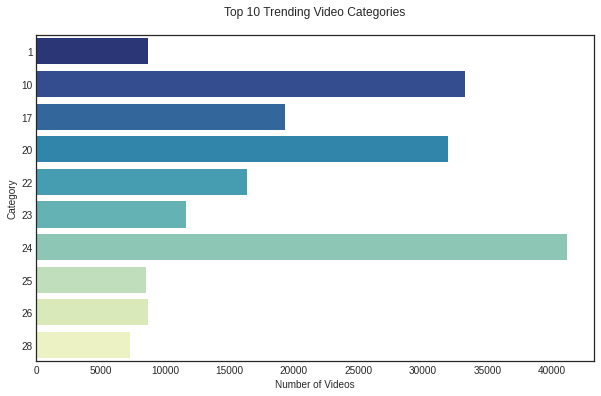

In [ ]:
# Top 10 Categories having highest trending videos

videos_by_category = data.groupby("categoryId").size().reset_index(name="no_of_videos") \
    .sort_values("no_of_videos", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,6))
vbcat_plot = sns.barplot(x="no_of_videos", y="categoryId", data=videos_by_category, palette="YlGnBu_r", orient = 'h')
vbcat_plot = ax.set(xlabel="Number of Videos", ylabel="Category")
plt.title("Top 10 Trending Video Categories\n")
plt.show()

In [ ]:
def get_top_ngrams(df,n=None,stop_word_remove=True,range=(1,1)):
    if (stop_word_remove):
        vec = CountVectorizer(stop_words='english',ngram_range=range).fit(df)
    else:
        vec = CountVectorizer(ngram_range=range).fit(df)
    bag_of_words = vec.transform(df)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word,sum_words[0,i]) for word,i in vec.vocabulary_.items()]
    #words_freq = list(cv_fit.vocabulary_.items())
    words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
    
    return words_freq[:n]

In [ ]:
common_word = get_top_ngrams(data['title'],25)
common_word


[('official', 24843),
 ('video', 20932),
 ('vs', 9499),
 ('trailer', 8861),
 ('minecraft', 8078),
 ('music', 7615),
 ('highlights', 6823),
 ('new', 6397),
 ('ft', 5600),
 ('game', 4973),
 ('season', 3486),
 ('world', 3314),
 ('shorts', 3298),
 ('day', 3126),
 ('feat', 3008),
 ('live', 3005),
 ('lil', 2720),
 ('audio', 2695),
 ('life', 2629),
 ('challenge', 2519),
 ('best', 2427),
 ('nba', 2393),
 ('episode', 2355),
 ('teaser', 2327),
 ('house', 2305)]

In [ ]:
common_words = get_top_ngrams(data['description'],25)
common_words

[('video', 91739),
 ('new', 69754),
 ('channel', 66018),
 ('instagram', 65989),
 ('twitter', 64641),
 ('music', 61807),
 ('subscribe', 58082),
 ('like', 56572),
 ('videos', 48742),
 ('youtube', 48221),
 ('follow', 46346),
 ('facebook', 41493),
 ('official', 39147),
 ('watch', 37400),
 ('httpsbitly', 35767),
 ('news', 32969),
 ('make', 31535),
 ('httpbitly', 31226),
 ('minecraft', 31171),
 ('love', 29485),
 ('know', 29149),
 ('que', 28791),
 ('world', 28676),
 ('free', 28291),
 ('just', 28144)]

In [ ]:
common_words = get_top_ngrams(data['tags'],25)
common_words

[('vs', 24864),
 ('new', 14646),
 ('minecraft', 11139),
 ('season', 11077),
 ('music', 9931),
 ('game', 8467),
 ('night', 6705),
 ('official', 6466),
 ('days', 6113),
 ('video', 6110),
 ('best', 5490),
 ('legends', 5461),
 ('minecraftminecraft', 5110),
 ('life', 4874),
 ('league', 4684),
 ('world', 4286),
 ('got', 3924),
 ('fortnite', 3615),
 ('star', 3587),
 ('battle', 3567),
 ('episode', 3514),
 ('chapter', 3410),
 ('perfect', 3401),
 ('real', 3338),
 ('trailer', 3333)]

In [ ]:
def show_data(common_words):
    df_ngram = pd.DataFrame(common_words,columns=['word','count'])
    df_ngram = df_ngram.groupby('word').sum()['count'].sort_values(ascending=False).reset_index()

    fig,ax = plt.subplots(figsize=(14,6))
    fig = sns.barplot(x = 'word',y='count',data=df_ngram,ci = None, ax=ax)

    ax.set_xticklabels(labels=df_ngram['word'], rotation=45, ha='right')
    plt.show()


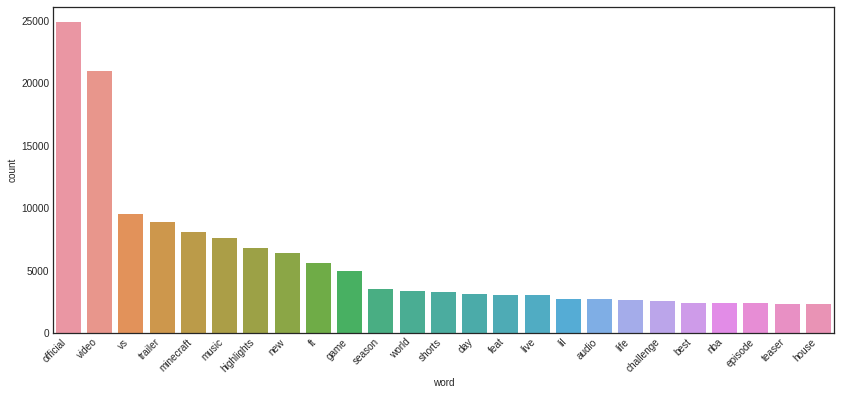

In [ ]:
common_word = get_top_ngrams(data['title'],25)
show_data(common_word)


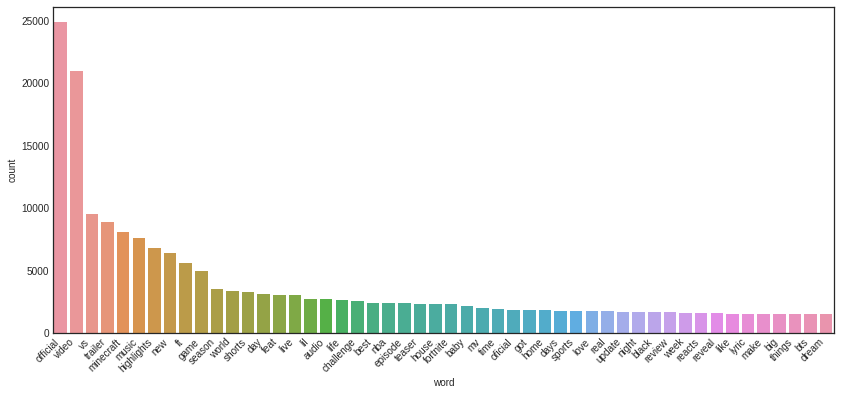

In [ ]:
common_words = get_top_ngrams(data['title'],50,True)
show_data(common_words)

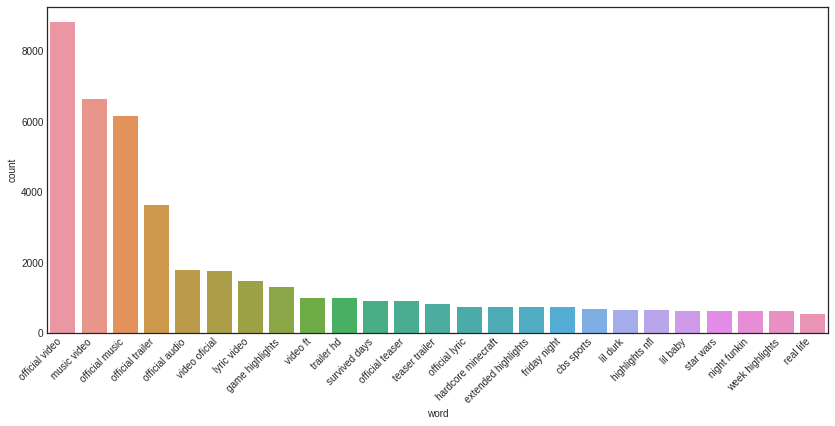

In [ ]:
common_words = get_top_ngrams(data['title'],25,True,range=(2,2))
show_data(common_words)

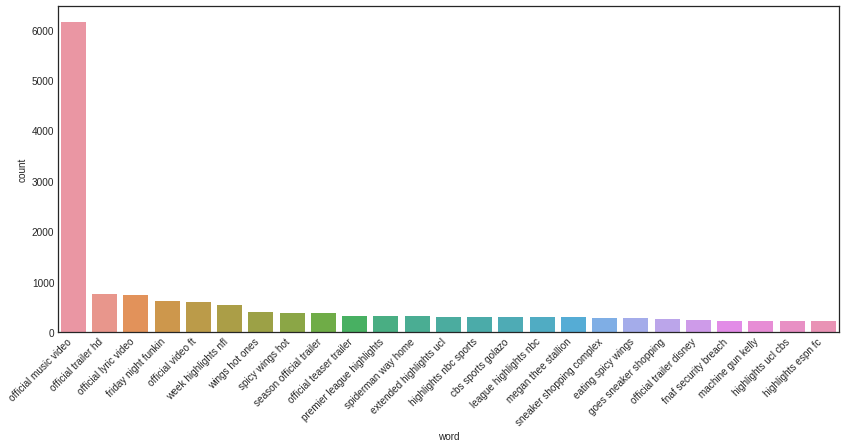

In [ ]:
common_words = get_top_ngrams(data['title'],25,True,range=(3,3))
show_data(common_words)

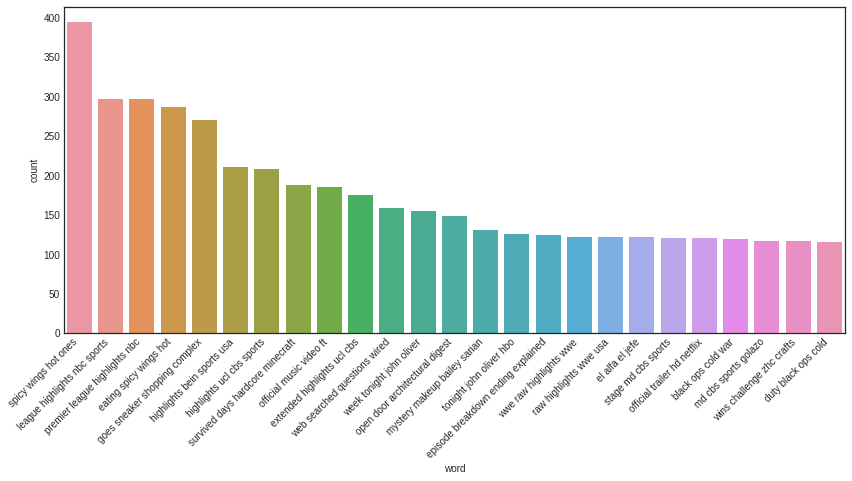

In [ ]:
common_words = get_top_ngrams(data['title'],25,True,range=(4,4))
show_data(common_words)

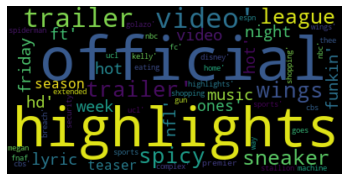

In [ ]:
wordcloudd = wordcloud.WordCloud().generate(str(common_words))
plt.imshow(wordcloudd, interpolation='bilinear')
plt.axis("off")
plt.show()

###LSTM

In [ ]:
MAX_SEQUENCE_LENGTH = 1000
#MAX_NB_WORDS = 20000
MAX_NB_WORDS = 2000
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 100
NUM_BINS = 6   #we have 16 categories 
np.random.seed(0)

In [ ]:
def top_k_percentile_views_mask(df, k):
    top_k_percent = df['view_count'].nlargest(int(df.shape[0] * (k / 100.))).iloc[-1]
    return df['view_count'] > top_k_percent

In [ ]:
#GloVe Embedding

embeddings_index = {}
f = open('/content/glove.6B.100d.txt'.format(EMBEDDING_DIM), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print ('Found %s word vectors.' % len(embeddings_index))

#df = pd.read_csv('../../data/data.csv', encoding='latin1')

data['Percentile_Bin'] = pd.qcut(data['view_count'], NUM_BINS, labels=range(NUM_BINS))
data = data.dropna()

Found 400000 word vectors.


In [ ]:
data['All'] = data.description_lem + ' ' + str(data.likes) + ' ' + data.title_lem

In [ ]:
X = data['All']
y = data['Percentile_Bin']

texts = set()
for x in X:
    texts.add(x)

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

dataa = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(y))
print('Shape of data tensor:', dataa.shape)
print('Shape of label tensor:', labels.shape)

Found 309597 unique tokens.
Shape of data tensor: (39074, 1000)
Shape of label tensor: (199515, 6)


In [ ]:
# split the data into a training set and a validation set

indices = np.arange(dataa.shape[0])
np.random.shuffle(indices)
dataa = dataa[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * dataa.shape[0])

x_train = dataa[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = dataa[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [ ]:
# prepare embedding matrix

num_words = min(MAX_NB_WORDS, len(word_index.items()))
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NB_WORDS or i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
# create the model
batch_size = 32
model1 = Sequential()
model1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x_train.shape[1]))
model1.add(Conv1D(filters=96, kernel_size=3, padding='same', activation='relu'))
#model1.add(MaxPooling1D(pool_size=2))
model1.add(LSTM(100,  kernel_regularizer = regularizers.l2(0.01)))
# model1.add(LSTM(200))
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(6, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.01)

model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1000, 100)         200000    
                                                                 
 conv1d_3 (Conv1D)           (None, 1000, 96)          28896     
                                                                 
 lstm_3 (LSTM)               (None, 100)               78800     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 6)                 606       
                                                                 
Total params: 318,402
Trainable params: 318,402
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Early Stopping

callback = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    min_delta=0,
    patience=9,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [ ]:
history = model1.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val), batch_size=64, callbacks=[callback])

Epoch 1/15
489/489 [==============================] - 37s 71ms/step - loss: 1.7820 - accuracy: 0.1899 - val_loss: 1.7833 - val_accuracy: 0.1842
Epoch 2/15
489/489 [==============================] - 34s 70ms/step - loss: 1.7819 - accuracy: 0.1868 - val_loss: 1.7835 - val_accuracy: 0.1885
Epoch 3/15
489/489 [==============================] - 35s 72ms/step - loss: 1.7821 - accuracy: 0.1905 - val_loss: 1.7822 - val_accuracy: 0.1803
Epoch 4/15
489/489 [==============================] - 34s 70ms/step - loss: 1.7819 - accuracy: 0.1908 - val_loss: 1.7825 - val_accuracy: 0.1885
Epoch 5/15
489/489 [==============================] - 34s 70ms/step - loss: 1.7820 - accuracy: 0.1920 - val_loss: 1.7823 - val_accuracy: 0.1885
Epoch 6/15
489/489 [==============================] - 34s 69ms/step - loss: 1.7817 - accuracy: 0.1913 - val_loss: 1.7838 - val_accuracy: 0.1885
Epoch 7/15
489/489 [==============================] - 34s 70ms/step - loss: 1.7819 - accuracy: 0.1901 - val_loss: 1.7824 - val_accuracy:

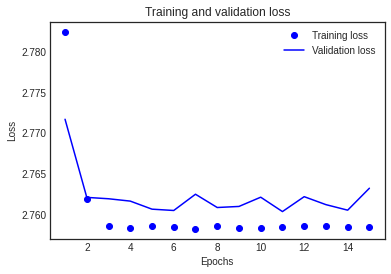

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

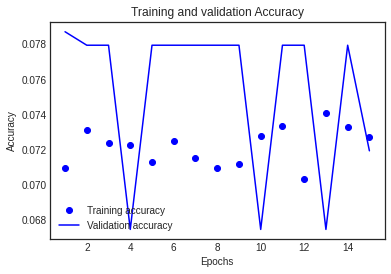

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b' , label = 'Validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Final evaluation of the model
scores = model1.evaluate(x_val, y_val)
print("Accuracy: %.3f%%" % (scores[1]*100))

###Sentiment

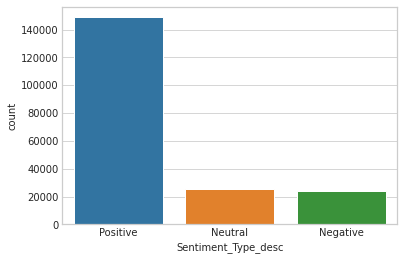

In [ ]:
bloblist_title = list()

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

data['TextBlob_Polarity_desc'] = data['description_lem'].apply(getPolarity)

def f(data):
    if data['TextBlob_Polarity_desc'] > 0:
        val = "Positive"
    elif data['TextBlob_Polarity_desc'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

data['Sentiment_Type_desc'] =data.apply(f, axis=1)

plt.figure()
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type_desc", data=data)

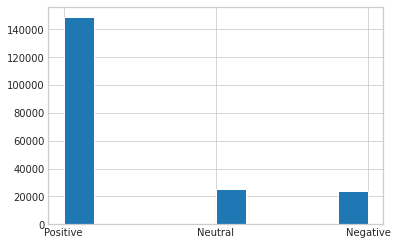

In [ ]:
#Polarity Plot - Description - Histogram

data["Sentiment_Type_desc"].hist()

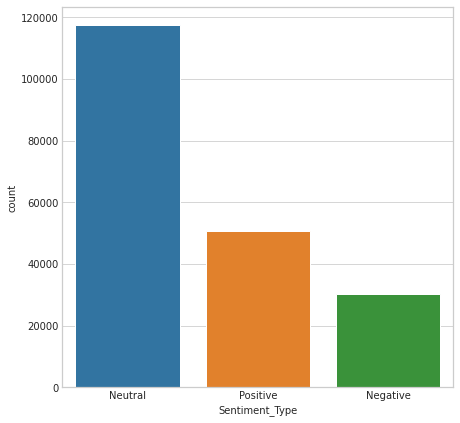

In [ ]:
bloblist_title = list()

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

data['TextBlob_Polarity'] = data['title_lem'].apply(getPolarity)

def f(data):
    if data['TextBlob_Polarity'] > 0:
        val = "Positive"
    elif data['TextBlob_Polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

data['Sentiment_Type'] =data.apply(f, axis=1)

plt.figure(figsize=(7,7))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=data)

we can very clearly see that the top trending videos have a slightly positive polarity with the majority being neutral.

In [ ]:
plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['categoryId'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("Categories")
plt.ylabel("polarity")
plt.title("Polarity of Categories in Youtube videos")

NameError: ignored

<Figure size 1152x720 with 0 Axes>

###Random Forest

In [ ]:
data['All_text'] = data.description_lem + ' ' + data.tags + ' ' + data.title_lem

In [ ]:
data.category_name.value_counts()

Entertainment            41365
Music                    33443
Gaming                   32124
Sports                   19408
People & Blogs           16446
Comedy                   11696
Howto & Style             8727
Film & Animation          8719
News & Politics           8595
Science & Technology      7327
Education                 5387
Autos & Vehicles          3225
Pets & Animals            1626
Travel & Events           1203
Nonprofits & Activism      167
Shows                       57
Name: category_name, dtype: int64

In [ ]:
data_filtered = data[data.category_name.isin(['Entertainment', 'Sports', 'Music', 'Gaming', 'People & Blogs', 'Comedy','News & Politics'])]

In [ ]:
X = data_filtered.All_text

In [ ]:
Y = data_filtered.category_name

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [ ]:
# Applying bag of words to features in training and testing data
bag_of_words_creator = CountVectorizer()
X_train_bow = bag_of_words_creator.fit_transform(X_train)
X_test_bow = bag_of_words_creator.transform(X_test)

In [ ]:
#cl = RandomForestClassifier(random_state = 0, n_estimators=1000)
cl = RandomForestClassifier(random_state = 0, n_estimators=20)
cl.fit(X_train_bow,Y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
y_pred = cl.predict(X_test_bow)

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[ 3510,     9,     1,     1,     0,     0,     0],
       [    1, 12489,     2,    20,     1,    19,     0],
       [    0,    20,  9526,     0,     0,     0,     4],
       [    2,    10,     2, 10018,     0,     0,     0],
       [    0,    10,     0,     0,  2572,     0,     1],
       [    0,    19,    13,     7,     2,  4876,     0],
       [    0,    20,     2,     0,     0,     0,  5767]])

In [ ]:
print(met.classification_report(Y_test,y_pred))

                 precision    recall  f1-score   support

         Comedy       1.00      1.00      1.00      3521
  Entertainment       0.99      1.00      0.99     12532
         Gaming       1.00      1.00      1.00      9550
          Music       1.00      1.00      1.00     10032
News & Politics       1.00      1.00      1.00      2583
 People & Blogs       1.00      0.99      0.99      4917
         Sports       1.00      1.00      1.00      5789

       accuracy                           1.00     48924
      macro avg       1.00      1.00      1.00     48924
   weighted avg       1.00      1.00      1.00     48924



In [ ]:
#TFIDF

tfidf_creator = TfidfVectorizer()
X_train_tfidf = tfidf_creator.fit_transform(X_train)
X_test_tfidf = tfidf_creator.transform(X_test)

#cl = RandomForestClassifier(random_state = 0, n_estimators=1000)
cl = RandomForestClassifier(random_state = 0, n_estimators=20)
cl.fit(X_train_tfidf,Y_train)

y_pred = cl.predict(X_test_tfidf)

confusion_matrix(Y_test,y_pred)



array([[ 3508,     7,     0,     1,     0,     5,     0],
       [    1, 12491,    11,    11,     7,    11,     0],
       [    4,    13,  9532,     0,     0,     1,     0],
       [    2,     4,     3, 10022,     0,     1,     0],
       [    0,     9,     0,     0,  2570,     3,     1],
       [    2,     7,    17,    10,     1,  4880,     0],
       [    0,    11,     4,     6,     0,     0,  5768]])

In [ ]:
print(met.classification_report(Y_test,y_pred))

                 precision    recall  f1-score   support

         Comedy       1.00      1.00      1.00      3521
  Entertainment       1.00      1.00      1.00     12532
         Gaming       1.00      1.00      1.00      9550
          Music       1.00      1.00      1.00     10032
News & Politics       1.00      0.99      1.00      2583
 People & Blogs       1.00      0.99      0.99      4917
         Sports       1.00      1.00      1.00      5789

       accuracy                           1.00     48924
      macro avg       1.00      1.00      1.00     48924
   weighted avg       1.00      1.00      1.00     48924



From this ML Model, We can find out the missing category of any video, based on the information obtained from title, tag and description

A platform like youtube can use this model to recommend the category to the users by doing real time analysis on title, tag and description while they are uploading their videos

In [ ]:
x = data[['categoryId','tag_word_count','description_word_count','title_word_count']] 
y = data['view_count']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 845661.50
RMSE: 3071062.12
R2 score: 0.85


Text(0.5, 1.0, 'feature importance score')

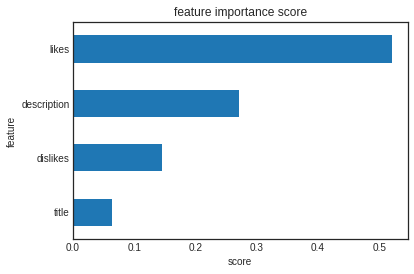

In [ ]:
#make feature importance graph
X = data[['title', 'description', 'likes', 'dislikes']] 
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

###Decision Tree

In [ ]:
x = data[['categoryId','tag_word_count','description_word_count','title_word_count']] 
y = data['view_count']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 790644.44
RMSE: 3057670.02
R2 score: 0.84


In [ ]:
pred

array([1515317.        ,  791126.5       , 1093204.5       , ...,
        435640.71428571, 2680867.        , 1581690.125     ])

In [ ]:
ytest

145105     796546
24699      770212
101442     660810
183857     259441
165960     983154
           ...   
142246     545248
79295      784313
61069      480696
5487      2769014
15074     3125448
Name: view_count, Length: 39743, dtype: int64

##Tranformers

In [ ]:
!pip install transformers --quiet
!pip install torch==1.9.0 --quiet
!pip install textattack --quiet
!pip install urllib3==1.25.4 --quiet
!pip install folium==0.2.1 --quiet
!pip install datasets --quiet
!pip install pytorch_pretrained_bert --quiet
!pip install tensorflow-text

!pip install git+https://github.com/NeuromatchAcademy/evaltools --quiet
from evaltools.airtable import AirtableForm

# generate airtable form
atform = AirtableForm('appn7VdPRseSoMXEG','W2D4_T1','https://portal.neuromatchacademy.org/api/redirect/to/720613bf-c3cd-4fae-9286-b1c3cced6728')


     |████████████████████████████████| 5.3 MB 36.0 MB/s 
     |████████████████████████████████| 7.6 MB 59.7 MB/s 
     |████████████████████████████████| 163 kB 73.6 MB/s 
     |████████████████████████████████| 831.4 MB 2.7 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.9.0 which is incompatible.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.9.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.9.0 which is incompatible.
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/p

In [ ]:
# Imports
import tqdm
import math
import torch
import statistics
import random

import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torch import nn
from pprint import pprint
from tqdm.notebook import tqdm
from datasets import load_metric
from datasets import load_dataset

# transformers library
from transformers import Trainer
from transformers import pipeline
from transformers import set_seed
from transformers import AutoTokenizer
from transformers import TrainingArguments
from transformers import AutoModelForCausalLM
from transformers import AutoModelForSequenceClassification


%load_ext tensorboard

In [ ]:
context = data['title']

In [ ]:
model_name = "gpt2" #param ["gpt2", "gpt2-medium", "xlnet-base-cased"]
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval()
tokenizer = AutoTokenizer.from_pretrained(model_name)
# markdown **Select a pre-trained language model to score the likelihood of extended review**

# markdown *(might take some time to download the pre-trained weights for the first time)*

# markdown ---
custom_positive_extension = "I would definitely recommend this!" #param {type:"string"}
custom_negative_extension = "I would not recommend this!" #param {type:"string"}
# markdown **Provide custom positive and negative extensions to the review **

texts = [context[3], custom_positive_extension, custom_negative_extension]
encodings = tokenizer(texts)

positive_input_ids = torch.tensor(encodings["input_ids"][0] + encodings["input_ids"][1])
positive_attention_mask = torch.tensor(encodings["attention_mask"][0] + encodings["attention_mask"][1])
positive_label_ids = torch.tensor([-100]*len(encodings["input_ids"][0]) + encodings["input_ids"][1])

outputs = model(input_ids=positive_input_ids,
                attention_mask=positive_attention_mask,
                labels=positive_label_ids)
positive_extension_likelihood = -1*outputs.loss
print("\nLog-likelihood of positive extension = ", positive_extension_likelihood.item())

negative_input_ids = torch.tensor(encodings["input_ids"][0] + encodings["input_ids"][2])
negative_attention_mask = torch.tensor(encodings["attention_mask"][0] + encodings["attention_mask"][2])
negative_label_ids = torch.tensor([-100]*len(encodings["input_ids"][0]) + encodings["input_ids"][2])
outputs = model(input_ids=negative_input_ids,
                attention_mask=negative_attention_mask,
                labels=negative_label_ids)
negative_extension_likelihood = -1*outputs.loss
print("\nLog-likelihood of negative extension = ", negative_extension_likelihood.item())

if (positive_extension_likelihood.item() > negative_extension_likelihood.item()):
    print("\nPositive text-extension has greater likelihood probabilities!")
    print("The given review can be predicted to be POSITIVE ")
else:
    print("\nNegative text-extension has greater likelihood probabilities!")
    print("The given review can be predicted to be NEGATIVE ")
# markdown **NOTE:** *Run this cell after setting all the fields appropriately!*


Log-likelihood of positive extension =  -5.478392124176025

Log-likelihood of negative extension =  -5.6785888671875

Positive text-extension has greater likelihood probabilities!
The given review can be predicted to be POSITIVE 👍


In [ ]:
l = []

for i in range(0, int(len(data['title']))):
  texts = [context[i], custom_positive_extension, custom_negative_extension]
  encodings = tokenizer(texts)

  positive_input_ids = torch.tensor(encodings["input_ids"][0] + encodings["input_ids"][1])
  positive_attention_mask = torch.tensor(encodings["attention_mask"][0] + encodings["attention_mask"][1])
  positive_label_ids = torch.tensor([-100]*len(encodings["input_ids"][0]) + encodings["input_ids"][1])
  outputs = model(input_ids=positive_input_ids,
                attention_mask=positive_attention_mask,
                labels=positive_label_ids)
  positive_extension_likelihood = -1*outputs.loss
  #print("\nLog-likelihood of positive extension = ", positive_extension_likelihood.item())

  negative_input_ids = torch.tensor(encodings["input_ids"][0] + encodings["input_ids"][2])
  negative_attention_mask = torch.tensor(encodings["attention_mask"][0] + encodings["attention_mask"][2])
  negative_label_ids = torch.tensor([-100]*len(encodings["input_ids"][0]) + encodings["input_ids"][2])
  outputs = model(input_ids=negative_input_ids,
                attention_mask=negative_attention_mask,
                labels=negative_label_ids)
  negative_extension_likelihood = -1*outputs.loss
  if (positive_extension_likelihood.item() > negative_extension_likelihood.item()):
    l.append(1)
  else:
    l.append(0)